# Check the output HEPEVT files

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readNewHepevt(filename):
    events = []
    with open(filename, 'r') as f:
        while True:
            header = f.readline()
            if not header:
                break  # End of file
            parts = header.strip().split()
            if len(parts) < 3:
                continue
            event_id = int(parts[0])
            vertex_id = int(parts[1])
            n_particles = int(parts[2])

            particles = []
            for _ in range(n_particles):
                line = f.readline()
                data = line.strip().split()
                if len(data) < 15:
                    continue
                particle = {
                    "ISTHEP": int(data[0]),
                    "IDHEP": int(data[1]),
                    "JMOHEP1": int(data[2]),
                    "JMOHEP2": int(data[3]),
                    "JDAHEP1": int(data[4]),
                    "JDAHEP2": int(data[5]),
                    "PHEP1": float(data[6]),
                    "PHEP2": float(data[7]),
                    "PHEP3": float(data[8]),
                    "PHEP4": float(data[9]),
                    "PHEP5": float(data[10]),
                    "VHEP1": float(data[11]),
                    "VHEP2": float(data[12]),
                    "VHEP3": float(data[13]),
                    "VHEP4": float(data[14]),
                }
                particles.append(particle)

            events.append((event_id, vertex_id, particles))
    return events

In [3]:
fName = '/Users/yuntse/data/lartpc_rd/gampix/gen/nurad/nueArCC_garching_nh_mxpypzDir-rad-vd-reduced_00.hepevt'

In [4]:
Events = readNewHepevt( fName )

In [5]:
VHEP1 = [ particle['VHEP1'] for evtID, vID, particles in Events for particle in particles if particle['ISTHEP'] == 1 ]
VHEP2 = [ particle['VHEP2'] for evtID, vID, particles in Events for particle in particles if particle['ISTHEP'] == 1 ]
VHEP3 = [ particle['VHEP3'] for evtID, vID, particles in Events for particle in particles if particle['ISTHEP'] == 1 ]
VHEP4 = [ particle['VHEP4'] for evtID, vID, particles in Events for particle in particles if particle['ISTHEP'] == 1 ]

In [6]:
aVHEP1 = np.array(VHEP1)
aVHEP2 = np.array(VHEP2)
aVHEP3 = np.array(VHEP3)
aVHEP4 = np.array(VHEP4)

In [7]:
aVHEP1.max(), aVHEP1.min(), aVHEP2.max(), aVHEP2.min(), aVHEP3.max(), aVHEP3.min(), aVHEP4.max(), aVHEP4.min()

(350.4999993443489,
 -424.9981073331834,
 149.99992847442627,
 -149.9999140084268,
 1195.9399901008608,
 895.9401422786714,
 5452945.537927459,
 -4284997.956752777)

(-4500.0, 5500.0)

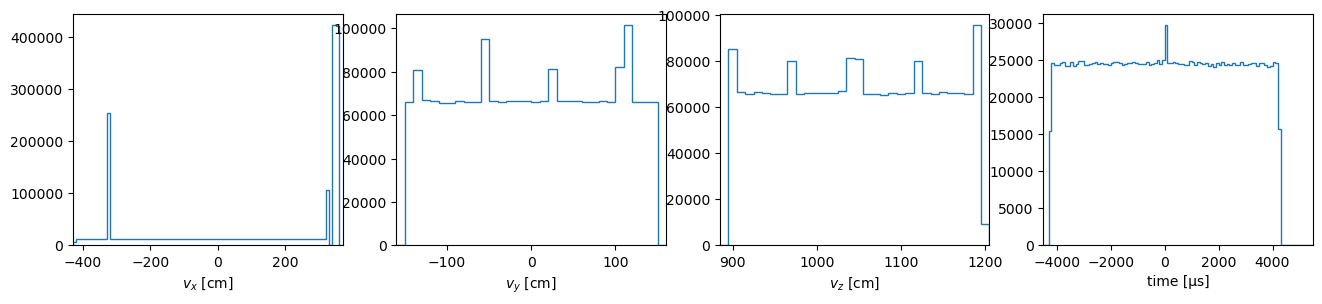

In [8]:
fig, ax = plt.subplots(1, 4, figsize = (16, 3) )

ax[0].hist(aVHEP1, bins = np.linspace(-430, 370, 81), histtype = 'step')
ax[0].set_xlabel(r'$v_x$ [cm]')
ax[0].set_xlim( [-430, 370] )

ax[1].hist(aVHEP2, bins = np.linspace(-160, 160, 33), histtype = 'step')
ax[1].set_xlabel(r'$v_y$ [cm]')
ax[1].set_xlim( [-160, 160] )

ax[2].hist(aVHEP3, bins = np.linspace(885, 1205, 33), histtype = 'step')
ax[2].set_xlabel(r'$v_z$ [cm]')
ax[2].set_xlim( [885, 1205] )

ax[3].hist(aVHEP4/1000, bins = np.linspace( -4500, 5500, 101), histtype = 'step')
ax[3].set_xlabel('time [µs]')
ax[3].set_xlim( [-4500, 5500])

In [ ]:
bVHEP1 = [ particle['VHEP1'] for evtID, vID, particles in Events for particle in particles if (particle['ISTHEP'] == 1) and (vID > 0) ]
bVHEP2 = [ particle['VHEP2'] for evtID, vID, particles in Events for particle in particles if (particle['ISTHEP'] == 1) and (vID > 0) ]
bVHEP3 = [ particle['VHEP3'] for evtID, vID, particles in Events for particle in particles if (particle['ISTHEP'] == 1) and (vID > 0) ]
bVHEP4 = [ particle['VHEP4'] for evtID, vID, particles in Events for particle in particles if (particle['ISTHEP'] == 1) and (vID > 0) ]

In [ ]:
abVHEP1 = np.array(rVHEP1)
abVHEP2 = np.array(rVHEP2)
abVHEP3 = np.array(rVHEP3)
abVHEP4 = np.array(rVHEP4)

In [ ]:
abVHEP1.max(), abVHEP1.min(), abVHEP2.max(), abVHEP2.min(), abVHEP3.max(), abVHEP3.min(), abVHEP4.max(), abVHEP4.min()

(350.4999993443489,
 -424.9981073331834,
 149.99992847442627,
 -149.9999140084268,
 1195.9399901008608,
 895.9401422786714,
 5452945.537927459,
 -4284997.956752777)

(-4500.0, 5500.0)

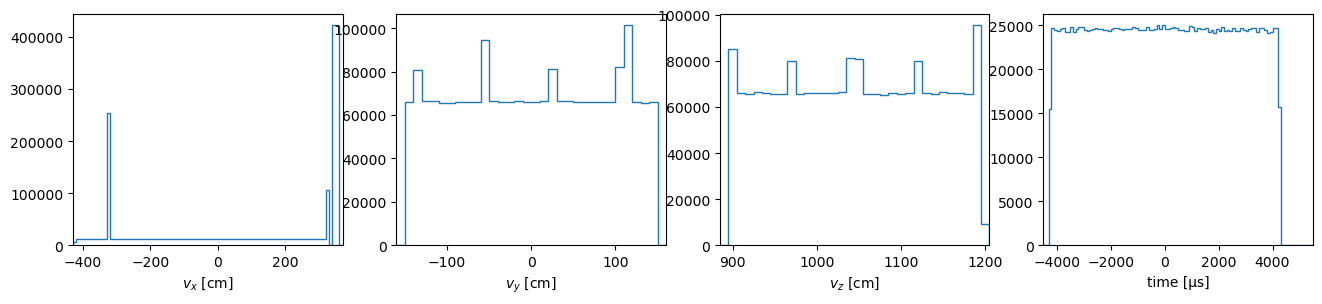

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (16, 3) )

ax[0].hist(abVHEP1, bins = np.linspace(-430, 370, 81), histtype = 'step')
ax[0].set_xlabel(r'$v_x$ [cm]')
ax[0].set_xlim( [-430, 370] )

ax[1].hist(abVHEP2, bins = np.linspace(-160, 160, 33), histtype = 'step')
ax[1].set_xlabel(r'$v_y$ [cm]')
ax[1].set_xlim( [-160, 160] )

ax[2].hist(abVHEP3, bins = np.linspace(885, 1205, 33), histtype = 'step')
ax[2].set_xlabel(r'$v_z$ [cm]')
ax[2].set_xlim( [885, 1205] )

ax[3].hist(abVHEP4/1000, bins = np.linspace( -4500, 5500, 101), histtype = 'step')
ax[3].set_xlabel('time [µs]')
ax[3].set_xlim( [-4500, 5500])